# Data Exploration

## Install dependencies

In [7]:
%pip install pandas
%pip install matplotlib
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load Mobilithek Aaachen and Meteostat Aachen Weather Datasets

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

aachen_mobilithek_data = pd.read_sql_table('aachen_mobilithek', 'sqlite:///data.sqlite')
aachen_meteostat_data = pd.read_sql_table('aachen_meteostat', 'sqlite:///data.sqlite')

### Observing Aachen Mobilithek Dataset

In [45]:
aachen_mobilithek_data.head(10)

,parameter,value,NumberOfVehicles,Geohash7,Period,Period_Num
0,Humidity,36.18,3,u1h2gky,2021-08-01 00:00:00+00:00,738003.0
1,Humidity,39.80,3,u1h2gmn,2021-08-01 00:00:00+00:00,738003.0
2,Humidity,34.33,3,u1h2gmp,2021-08-01 00:00:00+00:00,738003.0
3,Humidity,38.33,2,u1h2gmq,2021-08-01 00:00:00+00:00,738003.0
4,Humidity,40.09,2,u1h2gmj,2021-08-01 00:00:00+00:00,738003.0
5,Humidity,38.31,3,u1h2gkv,2021-08-01 00:00:00+00:00,738003.0
6,PM2.5,4.28,2,u1h2gmj,2021-08-01 00:00:00+00:00,738003.0
7,PM2.5,4.43,3,u1h2gmp,2021-08-01 00:00:00+00:00,738003.0
8,PM10,4.60,2,u1h2fen,2021-08-01 00:00:00+00:00,738003.0
9,PM2.5,4.52,2,u1h2gt2,2021-08-01 00:00:00+00:00,738003.0


In [49]:
# Drop rows with missing values
aachen_mobilithek_data.dropna(inplace=True)

### Observing Aachen Meteostat Dataset

In [48]:
aachen_meteostat_data.head(10)

,Date,Hour,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres
0,2021-08-01,0,14.1,13.0,93,0.0,216,9.3,14.8,1010.9
1,2021-08-01,1,13.8,12.9,94,0.0,212,11.1,16.7,1010.6
2,2021-08-01,2,13.6,13.0,96,0.0,213,11.1,16.7,1010.3
3,2021-08-01,3,13.4,12.5,94,0.0,215,13.0,18.5,1010.3
4,2021-08-01,4,13.2,12.6,96,0.0,217,13.0,18.5,1010.1
...,...,...,...,...,...,...,...,...,...,...
739,2021-08-31,19,16.9,12.2,74,0.0,355,9.3,16.7,1025.9
740,2021-08-31,20,15.9,12.5,80,0.0,351,9.3,16.7,1026.4
741,2021-08-31,21,15.2,12.3,83,0.0,351,9.3,14.8,1026.8
742,2021-08-31,22,14.7,12.4,86,0.0,352,7.4,14.8,1027.1


### Renaming Meteostat dataset's columns

In [22]:
aachen_meteostat_data.rename(columns={
    "dwpt": "dew point",
    "prcp": "precipitation",
    "rhum": "relative humidity",
    "wdir": "wind direction",
    "wspd": "average wind speed",
    "wpgt": "average wind gust",
    "pres": "pressure",
}, inplace=True)
aachen_meteostat_data.head(5)

,Date,Hour,temp,dew point,relative humidity,precipitation,wind direction,average wind speed,average wind gust,pressure
0,2021-08-01,0,14.1,13.0,93,0.0,216,9.3,14.8,1010.9
1,2021-08-01,1,13.8,12.9,94,0.0,212,11.1,16.7,1010.6
2,2021-08-01,2,13.6,13.0,96,0.0,213,11.1,16.7,1010.3
3,2021-08-01,3,13.4,12.5,94,0.0,215,13.0,18.5,1010.3
4,2021-08-01,4,13.2,12.6,96,0.0,217,13.0,18.5,1010.1


### Aachen Mobilithek dataset insight visualization

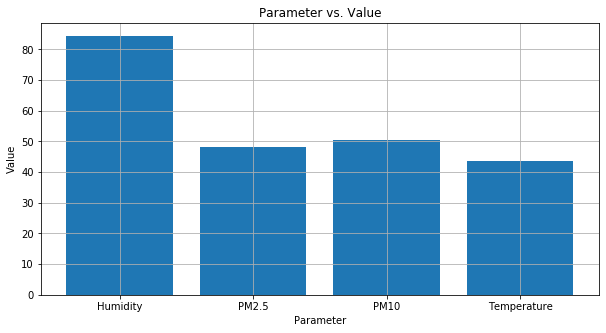

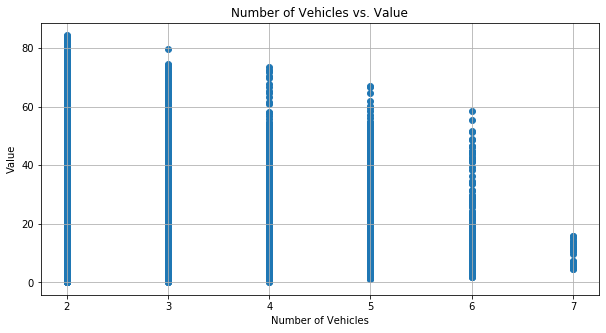

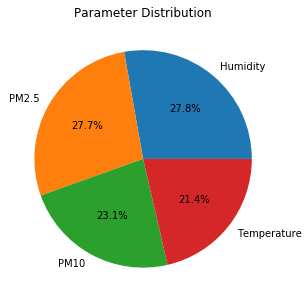

In [24]:
# Bar plot of parameter vs. value
plt.figure(figsize=(10, 5))
plt.bar(aachen_mobilithek_data['parameter'], aachen_mobilithek_data['value'])
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.title('Parameter vs. Value')
plt.grid(True)
plt.show()

# Scatter plot of NumberOfVehicles vs. value
plt.figure(figsize=(10, 5))
plt.scatter(aachen_mobilithek_data['NumberOfVehicles'], aachen_mobilithek_data['value'])
plt.xlabel('Number of Vehicles')
plt.ylabel('Value')
plt.title('Number of Vehicles vs. Value')
plt.grid(True)
plt.show()

# Pie chart of parameter distribution
plt.figure(figsize=(10, 5))
plt.pie(aachen_mobilithek_data['parameter'].value_counts(), labels=aachen_mobilithek_data['parameter'].unique(), autopct='%1.1f%%')
plt.title('Parameter Distribution')
plt.show()

/home/shaonsani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shaonsani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


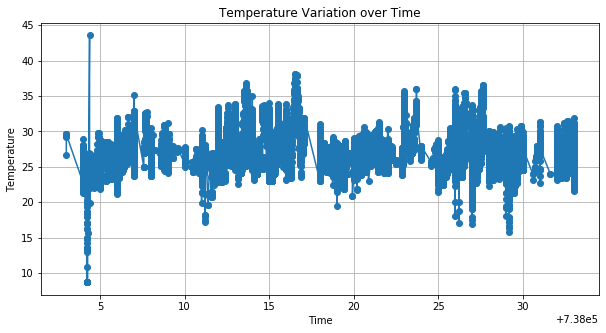

In [51]:
import matplotlib.dates as mdates
# Filter the DataFrame to include only rows where the parameter is 'Temperature'
temperature_data = aachen_mobilithek_data[aachen_mobilithek_data['parameter'] == 'Temperature']

# Convert 'Period' column to datetime type
temperature_data['Period'] = pd.to_datetime(temperature_data['Period'])

# Convert 'Period' column to numeric representation
temperature_data['Period_Num'] = mdates.date2num(temperature_data['Period'])

# Line plot of temperature over time
plt.figure(figsize=(10, 5))
plt.plot(temperature_data['Period_Num'], temperature_data['value'], marker='o')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Variation over Time')
plt.grid(True)
plt.show()

### Aachen Meteostat dataset insight visualization

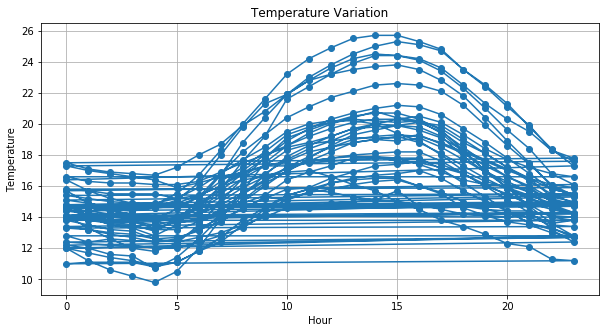

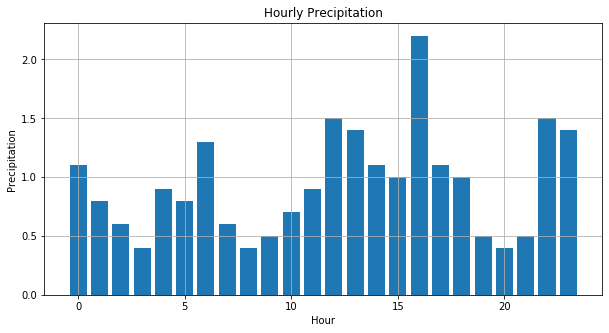

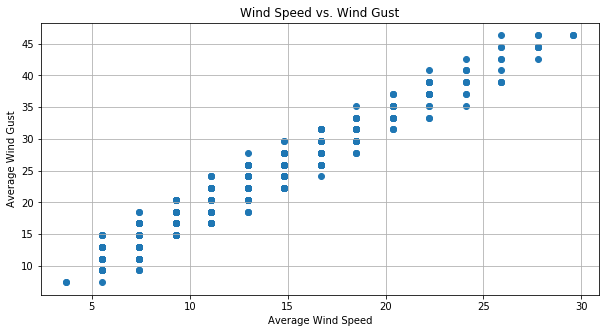

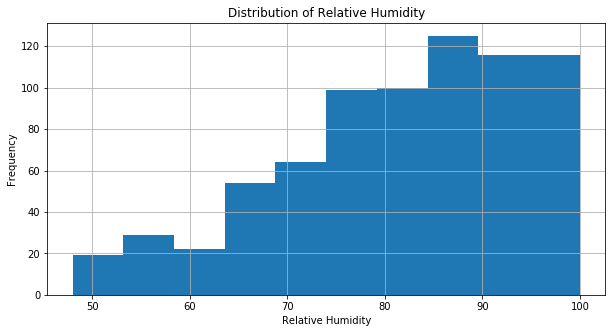

In [23]:
# Line plot of temperature over time
plt.figure(figsize=(10, 5))
plt.plot(aachen_meteostat_data['Hour'], aachen_meteostat_data['temp'], marker='o')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.grid(True)
plt.show()

# Bar plot of precipitation by hour
plt.figure(figsize=(10, 5))
plt.bar(aachen_meteostat_data['Hour'], aachen_meteostat_data['precipitation'])
plt.xlabel('Hour')
plt.ylabel('Precipitation')
plt.title('Hourly Precipitation')
plt.grid(True)
plt.show()

# Scatter plot of wind speed and wind gust
plt.figure(figsize=(10, 5))
plt.scatter(aachen_meteostat_data['average wind speed'], aachen_meteostat_data['average wind gust'])
plt.xlabel('Average Wind Speed')
plt.ylabel('Average Wind Gust')
plt.title('Wind Speed vs. Wind Gust')
plt.grid(True)
plt.show()

# Histogram of relative humidity
plt.figure(figsize=(10, 5))
plt.hist(aachen_meteostat_data['relative humidity'], bins=10)
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Humidity')
plt.grid(True)
plt.show()